In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#باز کردن فایل csv
df = pd.read_csv('customer_store_project[1].csv')
df.head()

,CustomerID,Age,Gender,ProductCategory,Price,Quantity,PurchaseDate
0,1102,20,Male,Electronics,969,4,2023-01-01
1,1435,57,Male,Groceries,1973,4,2023-01-02
2,1860,63,Female,Clothing,702,3,2023-01-03
3,1270,41,Male,Clothing,1569,2,2023-01-04
4,1106,49,Male,Sports,1861,4,2023-01-05


In [ ]:
#چک کردن داده های نال

In [3]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
ProductCategory    0
Price              0
Quantity           0
PurchaseDate       0
dtype: int64

In [4]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
ProductCategory    0
Price              0
Quantity           0
PurchaseDate       0
dtype: int64

In [5]:
# ساخت ستون میزان خرید
df['Total'] = df['Price']*df['Quantity']
df.head()

,CustomerID,Age,Gender,ProductCategory,Price,Quantity,PurchaseDate,Total
0,1102,20,Male,Electronics,969,4,2023-01-01,3876
1,1435,57,Male,Groceries,1973,4,2023-01-02,7892
2,1860,63,Female,Clothing,702,3,2023-01-03,2106
3,1270,41,Male,Clothing,1569,2,2023-01-04,3138
4,1106,49,Male,Sports,1861,4,2023-01-05,7444


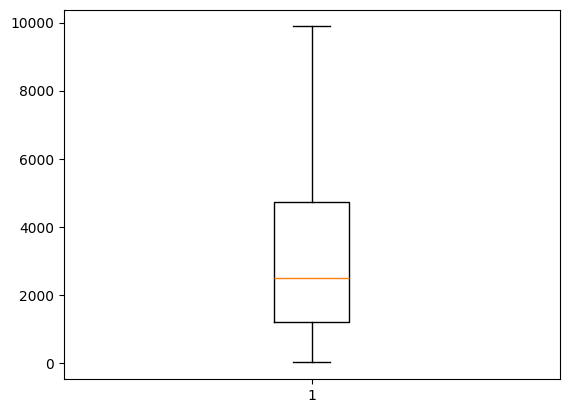

In [28]:
#کشیدن نمودار جعبه ای و استنتاجهای مهم از آن
plt.boxplot(df['Total']);

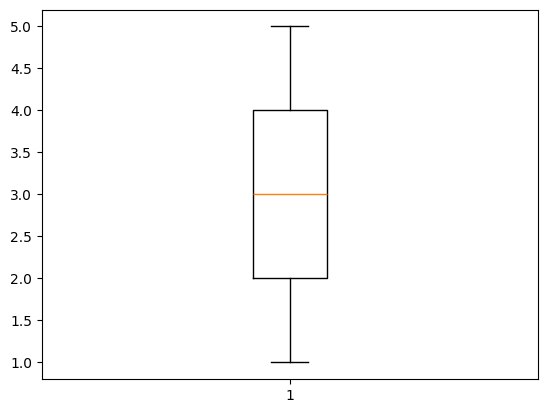

In [29]:
plt.boxplot(df['Quantity']);

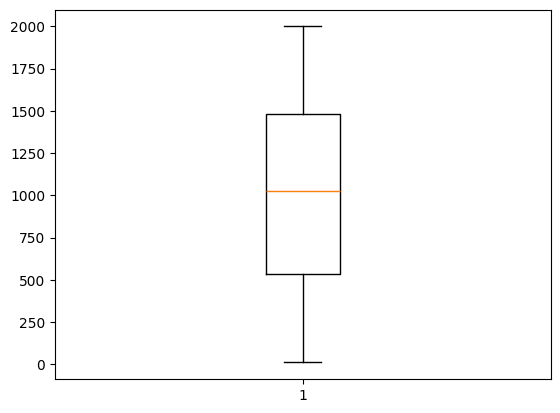

In [30]:
plt.boxplot(df['Price']);

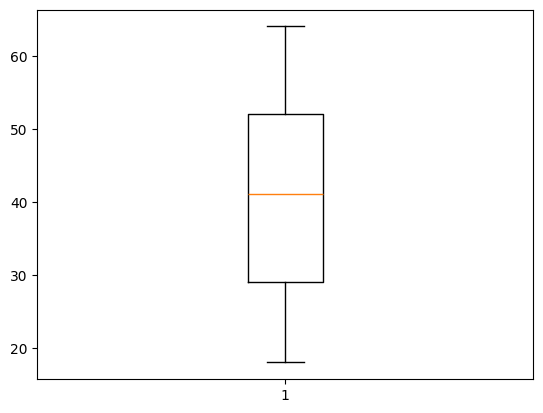

In [31]:
plt.boxplot(df['Age']);

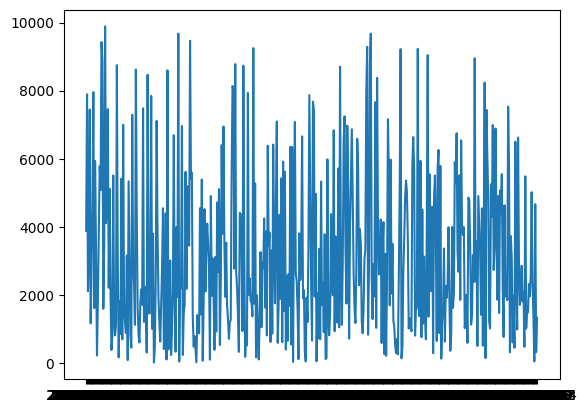

In [8]:
#میزان فروش روزانه
plt.plot(df['PurchaseDate'],df['Total'])

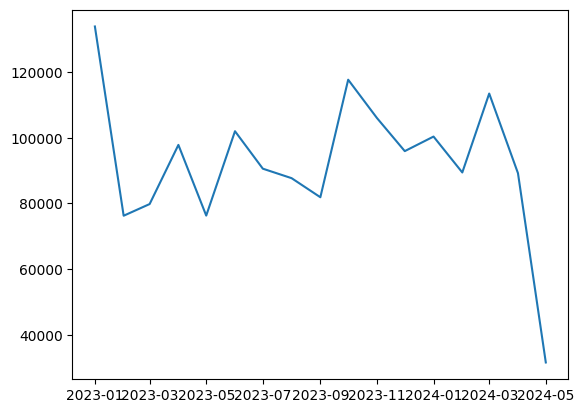

In [11]:
#میزان فروش ماهانه
df['Month'] = pd.to_datetime(df['PurchaseDate']).dt.to_period('M').dt.to_timestamp()
month = df.groupby('Month')['Total'].sum().reset_index()
plt.plot(month['Month'],month['Total'])

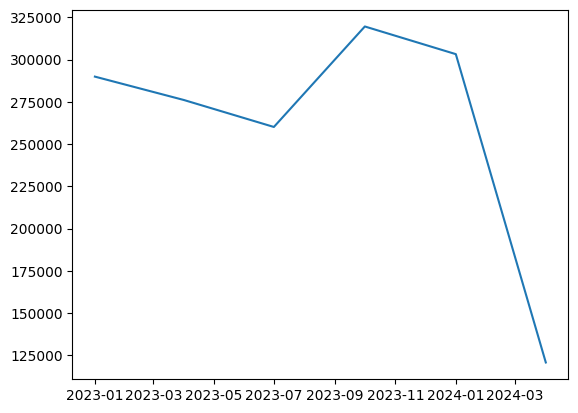

In [12]:
#میزان فروش فصلی
df['Q'] = pd.to_datetime(df['PurchaseDate']).dt.to_period('Q').dt.to_timestamp()
month = df.groupby('Q')['Total'].sum().reset_index()
plt.plot(month['Q'],month['Total'])

<BarContainer object of 500 artists>

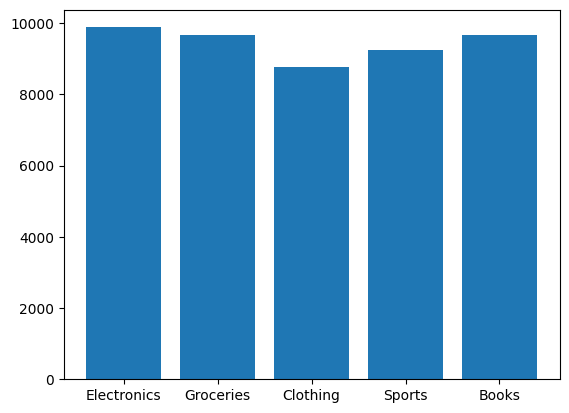

In [14]:
#میزان فروش براساس دسته
plt.bar(df['ProductCategory'],df['Total'])

In [17]:
#جمع میزان فروش براساس دسته
df.groupby('ProductCategory')['Total'].sum().sort_values()

ProductCategory
Sports         271802
Electronics    298169
Clothing       319974
Books          323417
Groceries      356252
Name: Total, dtype: int64

In [24]:
# میانگین فروش بر اساس دسته
df.groupby('ProductCategory')['Total'].mean().sort_values()

ProductCategory
Clothing       3018.622642
Books          3051.103774
Electronics    3073.907216
Sports         3235.738095
Groceries      3329.457944
Name: Total, dtype: float64

<BarContainer object of 500 artists>

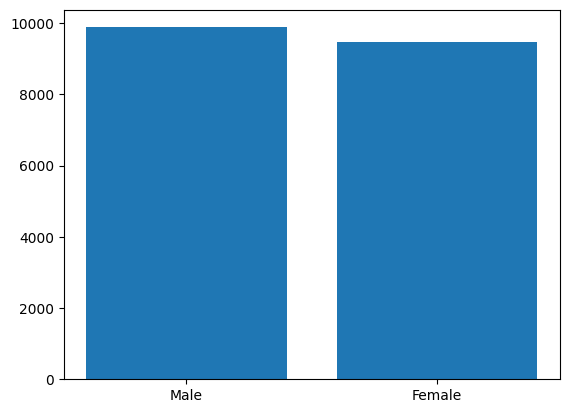

In [19]:
#میزان خرید بر اساس جنسیت
plt.bar(df['Gender'],df['Total'])

In [22]:
# جمع میزان خرید براساس جنسیت
sales_gender = df.groupby('Gender')['Total'].sum()
sales_gender

Gender
Female    747192
Male      822422
Name: Total, dtype: int64

In [23]:
#میانگین میزانخرید بر اساس جنسیت
mean_gender = df.groupby('Gender')['Total'].mean()
mean_gender

Gender
Female    3126.326360
Male      3151.042146
Name: Total, dtype: float64

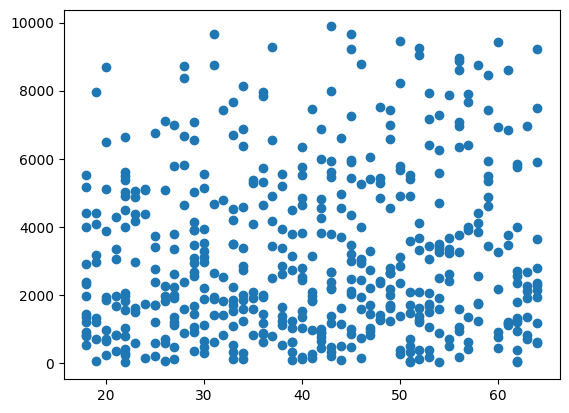

In [25]:
#همبستگی بین میزان خرید و سن خرید
plt.scatter(df['Age'],df['Total'])

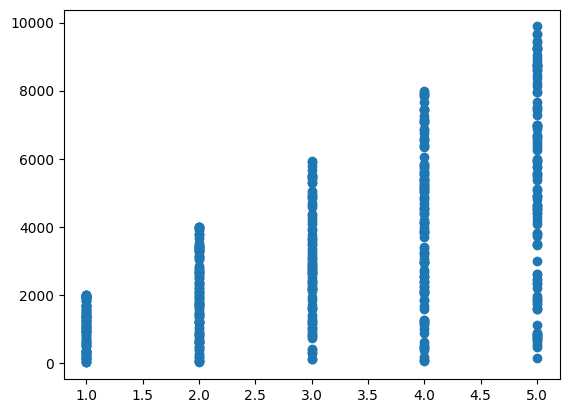

In [26]:
#همبستگی بین تعداد خرید و میزان خرید
plt.scatter(df['Quantity'],df['Total'])